In [33]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import networkx as nx
import matplotlib.pyplot as plt


In [2]:
cust = pd.read_excel('C:/Users/lenovo/Desktop/case study term 2/CustomersData.xlsx')
dis_cou = pd.read_csv('C:/Users/lenovo/Desktop/case study term 2/Discount_Coupon.csv')
market_spent = pd.read_csv('C:/Users/lenovo/Desktop/case study term 2/Marketing_Spend.csv')
online_sales = pd.read_csv('C:/Users/lenovo/Desktop/case study term 2/Online_Sales.csv')
tax_amount = pd.read_excel('C:/Users/lenovo/Desktop/case study term 2/Tax_amount.xlsx')

# DATA AUDIT

In [3]:
cust.head()

,CustomerID,Gender,Location,Tenure_Months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33
3,13748,F,California,30
4,15100,M,California,49


In [4]:
online_sales.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,16680,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
2,17850,16681,20190101,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used
3,17850,16682,20190101,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used
4,17850,16682,20190101,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used


In [5]:
market_spent.head()

,Date,Offline_Spend,Online_Spend
0,1/1/2019,4500,2424.50
1,1/2/2019,4500,3480.36
2,1/3/2019,4500,1576.38
3,1/4/2019,4500,2928.55
4,1/5/2019,4500,4055.30


In [7]:
market_spent.head()

,Date,Offline_Spend,Online_Spend
0,1/1/2019,4500,2424.50
1,1/2/2019,4500,3480.36
2,1/3/2019,4500,1576.38
3,1/4/2019,4500,2928.55
4,1/5/2019,4500,4055.30


In [4]:
market_spent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           365 non-null    object 
 1   Offline_Spend  365 non-null    int64  
 2   Online_Spend   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


In [9]:
print(market_spent['Date'].dtype) 

object


In [5]:
# Convert the 'Date' column to datetime format
market_spent['Date'] = pd.to_datetime(market_spent['Date'], errors='coerce')

In [6]:
# Check for rows with parsing errors (NaT values)
parsing_errors = market_spent[market_spent['Date'].isna()]

In [7]:
# Format the 'Date' column into the "mm/dd/yy" format
market_spent['Date'] = market_spent['Date'].dt.strftime('%m/%d/%y')

In [8]:
# Print the DataFrame with parsed and formatted dates
print("DataFrame with parsed and formatted dates:")
print(market_spent)

DataFrame with parsed and formatted dates:
         Date  Offline_Spend  Online_Spend
0    01/01/19           4500       2424.50
1    01/02/19           4500       3480.36
2    01/03/19           4500       1576.38
3    01/04/19           4500       2928.55
4    01/05/19           4500       4055.30
..        ...            ...           ...
360  12/27/19           4000       3396.87
361  12/28/19           4000       3246.84
362  12/29/19           4000       2546.58
363  12/30/19           4000        674.31
364  12/31/19           4000       2058.75

[365 rows x 3 columns]


In [9]:
print("\nRows with parsing errors:")
print(parsing_errors)


Rows with parsing errors:
Empty DataFrame
Columns: [Date, Offline_Spend, Online_Spend]
Index: []


In [10]:
market_spent

,Date,Offline_Spend,Online_Spend
0,01/01/19,4500,2424.50
1,01/02/19,4500,3480.36
2,01/03/19,4500,1576.38
3,01/04/19,4500,2928.55
4,01/05/19,4500,4055.30
...,...,...,...
360,12/27/19,4000,3396.87
361,12/28/19,4000,3246.84
362,12/29/19,4000,2546.58
363,12/30/19,4000,674.31


In [11]:
market_spent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           365 non-null    object 
 1   Offline_Spend  365 non-null    int64  
 2   Online_Spend   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


In [13]:
online_sales.head(5)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,16680,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
2,17850,16681,20190101,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used
3,17850,16682,20190101,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used
4,17850,16682,20190101,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used


In [14]:
print(online_sales['Transaction_Date'].dtype)

int64


In [19]:
df = online_sales

In [20]:
online_sales.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,16680,20190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
2,17850,16681,20190101,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used
3,17850,16682,20190101,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used
4,17850,16682,20190101,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used


In [21]:
# Convert the 'date' column to a string and then to datetime format
online_sales['Transaction_Date'] = pd.to_datetime(online_sales['Transaction_Date'].astype(str), format='%Y%m%d', errors='coerce')

In [22]:
# Format the 'date' column into the "dd-mm-yy" format
online_sales['Transaction_Date'] = online_sales['Transaction_Date'].dt.strftime('%d-%m-%y')

In [23]:
# Print the DataFrame with the formatted dates
print(online_sales)

       CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0           17850           16679         01-01-19  GGOENEBJ079499   
1           17850           16680         01-01-19  GGOENEBJ079499   
2           17850           16681         01-01-19  GGOEGFKQ020399   
3           17850           16682         01-01-19  GGOEGAAB010516   
4           17850           16682         01-01-19  GGOEGBJL013999   
...           ...             ...              ...             ...   
52919       14410           48493         31-12-19  GGOENEBB078899   
52920       14410           48494         31-12-19  GGOEGAEB091117   
52921       14410           48495         31-12-19  GGOENEBQ084699   
52922       14600           48496         31-12-19  GGOENEBQ079199   
52923       14600           48497         31-12-19  GGOENEBQ079099   

                                     Product_Description Product_Category  \
0      Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1    

In [24]:
online_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           52924 non-null  int64  
 1   Transaction_ID       52924 non-null  int64  
 2   Transaction_Date     52924 non-null  object 
 3   Product_SKU          52924 non-null  object 
 4   Product_Description  52924 non-null  object 
 5   Product_Category     52924 non-null  object 
 6   Quantity             52924 non-null  int64  
 7   Avg_Price            52924 non-null  float64
 8   Delivery_Charges     52924 non-null  float64
 9   Coupon_Status        52924 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 4.0+ MB


In [25]:
online_sales.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status
0,17850,16679,01-01-19,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
1,17850,16680,01-01-19,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used
2,17850,16681,01-01-19,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used
3,17850,16682,01-01-19,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used
4,17850,16682,01-01-19,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used


In [26]:
# Print the DataFrame with transformed dates
print(online_sales)

       CustomerID  Transaction_ID Transaction_Date     Product_SKU  \
0           17850           16679         01-01-19  GGOENEBJ079499   
1           17850           16680         01-01-19  GGOENEBJ079499   
2           17850           16681         01-01-19  GGOEGFKQ020399   
3           17850           16682         01-01-19  GGOEGAAB010516   
4           17850           16682         01-01-19  GGOEGBJL013999   
...           ...             ...              ...             ...   
52919       14410           48493         31-12-19  GGOENEBB078899   
52920       14410           48494         31-12-19  GGOEGAEB091117   
52921       14410           48495         31-12-19  GGOENEBQ084699   
52922       14600           48496         31-12-19  GGOENEBQ079199   
52923       14600           48497         31-12-19  GGOENEBQ079099   

                                     Product_Description Product_Category  \
0      Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA   
1    

In [15]:
# Convert the 'Transaction_Date' column to datetime format
online_sales['Transaction_Date'] = pd.to_datetime(online_sales['Transaction_Date'])

In [16]:
# Extract the month from the 'Transaction_Date' column and create a new column 'Month'
online_sales['Month'] = online_sales['Transaction_Date'].dt.strftime('%B')

In [17]:
# Print the DataFrame with the 'Month' column
print(online_sales)

       CustomerID  Transaction_ID              Transaction_Date  \
0           17850           16679 1970-01-01 00:00:00.020190101   
1           17850           16680 1970-01-01 00:00:00.020190101   
2           17850           16681 1970-01-01 00:00:00.020190101   
3           17850           16682 1970-01-01 00:00:00.020190101   
4           17850           16682 1970-01-01 00:00:00.020190101   
...           ...             ...                           ...   
52919       14410           48493 1970-01-01 00:00:00.020191231   
52920       14410           48494 1970-01-01 00:00:00.020191231   
52921       14410           48495 1970-01-01 00:00:00.020191231   
52922       14600           48496 1970-01-01 00:00:00.020191231   
52923       14600           48497 1970-01-01 00:00:00.020191231   

          Product_SKU                                Product_Description  \
0      GGOENEBJ079499  Nest Learning Thermostat 3rd Gen-USA - Stainle...   
1      GGOENEBJ079499  Nest Learning Thermo

In [18]:
dis_cou.head()

,Month,Product_Category,Coupon_Code,Discount_pct
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20


In [19]:
dis_cou.rename(columns={'Product_Category ': 'Product_Category'}, inplace=True)

In [20]:
month_names = {
    'Jan': 'January',
    'Feb': 'February',
    'Mar': 'March',
    'Apr': 'April',
    'May': 'May',
    'Jun': 'June',
    'Jul': 'July',
    'Aug': 'August',
    'Sep': 'September',
    'Oct': 'October',
    'Nov': 'November',
    'Dec': 'December'
}

dis_cou['Month'] = dis_cou['Month'].map(month_names)

In [21]:
dis_cou.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Month             204 non-null    object
 1   Product_Category  204 non-null    object
 2   Coupon_Code       204 non-null    object
 3   Discount_pct      204 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.5+ KB


In [34]:
dis_cou.head()

,Month,Product_Category,Coupon_Code,Discount_pct
0,January,Apparel,SALE10,10
1,February,Apparel,SALE20,20
2,March,Apparel,SALE30,30
3,January,Nest-USA,ELEC10,10
4,February,Nest-USA,ELEC20,20


In [35]:
online_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  int64         
 1   Transaction_ID       52924 non-null  int64         
 2   Transaction_Date     52924 non-null  datetime64[ns]
 3   Product_SKU          52924 non-null  object        
 4   Product_Description  52924 non-null  object        
 5   Product_Category     52924 non-null  object        
 6   Quantity             52924 non-null  int64         
 7   Avg_Price            52924 non-null  float64       
 8   Delivery_Charges     52924 non-null  float64       
 9   Coupon_Status        52924 non-null  object        
 10  Month                52924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 4.4+ MB


In [22]:
df = online_sales.merge(dis_cou, on=['Product_Category','Month'], how='left')

In [23]:
df.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct
0,17850,16679,1970-01-01 00:00:00.020190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,January,ELEC10,10.0
1,17850,16680,1970-01-01 00:00:00.020190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,January,ELEC10,10.0
2,17850,16681,1970-01-01 00:00:00.020190101,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,January,OFF10,10.0
3,17850,16682,1970-01-01 00:00:00.020190101,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,January,SALE10,10.0
4,17850,16682,1970-01-01 00:00:00.020190101,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,January,AIO10,10.0


In [38]:
cust.head()

,CustomerID,Gender,Location,Tenure_Months
0,17850,M,Chicago,12
1,13047,M,California,43
2,12583,M,Chicago,33
3,13748,F,California,30
4,15100,M,California,49


In [24]:
df = df.merge(cust, on=['CustomerID'], how='left')

In [25]:
df.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,Gender,Location,Tenure_Months
0,17850,16679,1970-01-01 00:00:00.020190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,January,ELEC10,10.0,M,Chicago,12
1,17850,16680,1970-01-01 00:00:00.020190101,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,January,ELEC10,10.0,M,Chicago,12
2,17850,16681,1970-01-01 00:00:00.020190101,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,January,OFF10,10.0,M,Chicago,12
3,17850,16682,1970-01-01 00:00:00.020190101,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,January,SALE10,10.0,M,Chicago,12
4,17850,16682,1970-01-01 00:00:00.020190101,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,January,AIO10,10.0,M,Chicago,12


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52924 entries, 0 to 52923
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  int64         
 1   Transaction_ID       52924 non-null  int64         
 2   Transaction_Date     52924 non-null  datetime64[ns]
 3   Product_SKU          52924 non-null  object        
 4   Product_Description  52924 non-null  object        
 5   Product_Category     52924 non-null  object        
 6   Quantity             52924 non-null  int64         
 7   Avg_Price            52924 non-null  float64       
 8   Delivery_Charges     52924 non-null  float64       
 9   Coupon_Status        52924 non-null  object        
 10  Month                52924 non-null  object        
 11  Coupon_Code          52524 non-null  object        
 12  Discount_pct         52524 non-null  float64       
 13  Gender               52924 non-

In [42]:
online_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  int64         
 1   Transaction_ID       52924 non-null  int64         
 2   Transaction_Date     52924 non-null  datetime64[ns]
 3   Product_SKU          52924 non-null  object        
 4   Product_Description  52924 non-null  object        
 5   Product_Category     52924 non-null  object        
 6   Quantity             52924 non-null  int64         
 7   Avg_Price            52924 non-null  float64       
 8   Delivery_Charges     52924 non-null  float64       
 9   Coupon_Status        52924 non-null  object        
 10  Month                52924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 4.4+ MB


In [43]:
tax_amount

,Product_Category,GST
0,Nest-USA,0.10
1,Office,0.10
2,Apparel,0.18
3,Bags,0.18
4,Drinkware,0.18
5,Lifestyle,0.18
6,Notebooks & Journals,0.05
7,Headgear,0.05
8,Waze,0.18
9,Fun,0.18


In [26]:
df = df.merge(tax_amount, on=['Product_Category'], how='left')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52924 entries, 0 to 52923
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  int64         
 1   Transaction_ID       52924 non-null  int64         
 2   Transaction_Date     52924 non-null  datetime64[ns]
 3   Product_SKU          52924 non-null  object        
 4   Product_Description  52924 non-null  object        
 5   Product_Category     52924 non-null  object        
 6   Quantity             52924 non-null  int64         
 7   Avg_Price            52924 non-null  float64       
 8   Delivery_Charges     52924 non-null  float64       
 9   Coupon_Status        52924 non-null  object        
 10  Month                52924 non-null  object        
 11  Coupon_Code          52524 non-null  object        
 12  Discount_pct         52524 non-null  float64       
 13  Gender               52924 non-

In [46]:
df.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,Gender,Location,Tenure_Months,GST
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,January,ELEC10,10.0,M,Chicago,12,0.10
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,January,ELEC10,10.0,M,Chicago,12,0.10
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,January,OFF10,10.0,M,Chicago,12,0.10
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,January,SALE10,10.0,M,Chicago,12,0.18
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,January,AIO10,10.0,M,Chicago,12,0.18


In [47]:
market_spent.head()

,Date,Offline_Spend,Online_Spend
0,01/01/19,4500,2424.50
1,01/02/19,4500,3480.36
2,01/03/19,4500,1576.38
3,01/04/19,4500,2928.55
4,01/05/19,4500,4055.30


In [48]:
market_spent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           365 non-null    object 
 1   Offline_Spend  365 non-null    int64  
 2   Online_Spend   365 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 8.7+ KB


In [27]:
# Convert the 'Date' column to 'datetime' data type
market_spent['Date'] = pd.to_datetime(market_spent['Date'])



In [28]:
# Check the data type of the 'Date' column after conversion
print(market_spent['Date'].dtype)



datetime64[ns]


In [29]:
# Print the DataFrame with the converted 'Date' column
print(market_spent)

          Date  Offline_Spend  Online_Spend
0   2019-01-01           4500       2424.50
1   2019-01-02           4500       3480.36
2   2019-01-03           4500       1576.38
3   2019-01-04           4500       2928.55
4   2019-01-05           4500       4055.30
..         ...            ...           ...
360 2019-12-27           4000       3396.87
361 2019-12-28           4000       3246.84
362 2019-12-29           4000       2546.58
363 2019-12-30           4000        674.31
364 2019-12-31           4000       2058.75

[365 rows x 3 columns]


In [52]:
df = df.merge(market_spent, left_on=['Transaction_Date'],right_on=['Date'], how='left')

In [53]:
df.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,Month,Coupon_Code,Discount_pct,Gender,Location,Tenure_Months,GST,Date,Offline_Spend,Online_Spend
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,January,ELEC10,10.0,M,Chicago,12,0.10,2019-01-01,4500,2424.5
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,January,ELEC10,10.0,M,Chicago,12,0.10,2019-01-01,4500,2424.5
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,January,OFF10,10.0,M,Chicago,12,0.10,2019-01-01,4500,2424.5
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,January,SALE10,10.0,M,Chicago,12,0.18,2019-01-01,4500,2424.5
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,January,AIO10,10.0,M,Chicago,12,0.18,2019-01-01,4500,2424.5


# 1.	Calculate Invoice amount or sale_amount or revenue for each transaction and item level
•	Invoice Value = (( Quantity*Avg_price)*(1-Dicount_pct)*(1+GST)) + Delivery_Charges


In [54]:
# Calculate the Invoice Value for each transaction and item level
df['Invoice_Value'] = (-(df['Quantity'] * df['Avg_Price']) *
                              (1 - df['Discount_pct']) *
                              (1 + df['GST'])) + df['Delivery_Charges']

In [55]:
df.head()

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,Coupon_Code,Discount_pct,Gender,Location,Tenure_Months,GST,Date,Offline_Spend,Online_Spend,Invoice_Value
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,ELEC10,10.0,M,Chicago,12,0.10,2019-01-01,4500,2424.5,1528.229
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,ELEC10,10.0,M,Chicago,12,0.10,2019-01-01,4500,2424.5,1528.229
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,...,OFF10,10.0,M,Chicago,12,0.10,2019-01-01,4500,2424.5,26.795
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,...,SALE10,10.0,M,Chicago,12,0.18,2019-01-01,4500,2424.5,937.343
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,...,AIO10,10.0,M,Chicago,12,0.18,2019-01-01,4500,2424.5,181.730


In [56]:
df['Invoice_Value'].sum()

98413716.5291

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52924 entries, 0 to 52923
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   CustomerID           52924 non-null  int64         
 1   Transaction_ID       52924 non-null  int64         
 2   Transaction_Date     52924 non-null  datetime64[ns]
 3   Product_SKU          52924 non-null  object        
 4   Product_Description  52924 non-null  object        
 5   Product_Category     52924 non-null  object        
 6   Quantity             52924 non-null  int64         
 7   Avg_Price            52924 non-null  float64       
 8   Delivery_Charges     52924 non-null  float64       
 9   Coupon_Status        52924 non-null  object        
 10  Month                52924 non-null  object        
 11  Coupon_Code          52524 non-null  object        
 12  Discount_pct         52524 non-null  float64       
 13  Gender               52924 non-

# 2. Perform Detailed Exploratory Analysis

a. Understanding Customer Acquisition:

Count the number of unique customers acquired every month to month customer growth.

In [62]:
# Convert 'Transaction_Date' to datetime format for sorting
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])

# Extract 'Year' and 'Month' to create a 'YearMonth' column
df['YearMonth'] = df['Transaction_Date'].dt.strftime('%Y-%m')

# Group by 'YearMonth' and count unique customers
customer_acquisition = df.groupby('YearMonth')['CustomerID'].nunique().reset_index()

# Rename columns for clarity
customer_acquisition.columns = ['Month', 'Unique_Customers_Acquired']

# Display the result
print(customer_acquisition)


      Month  Unique_Customers_Acquired
0   2019-01                        232
1   2019-02                        141
2   2019-03                        229
3   2019-04                        236
4   2019-05                        236
5   2019-06                        254
6   2019-07                        252
7   2019-08                        276
8   2019-09                        195
9   2019-10                        210
10  2019-11                        214
11  2019-12                        245


In [63]:
print(df['YearMonth'].head(5))


0    2019-01
1    2019-01
2    2019-01
3    2019-01
4    2019-01
Name: YearMonth, dtype: object


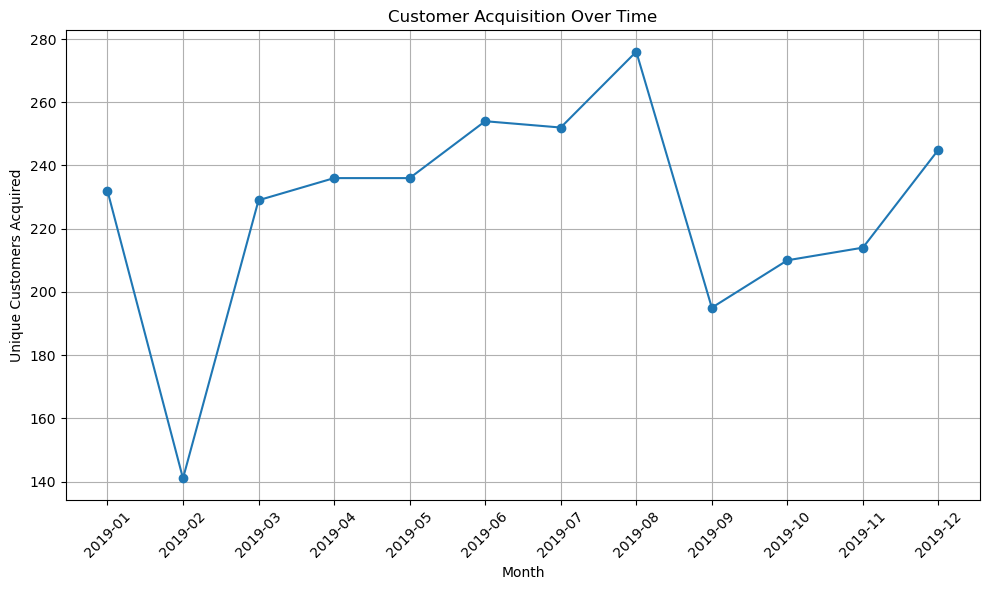

In [64]:
# Extract the data
months = customer_acquisition['Month']
unique_customers = customer_acquisition['Unique_Customers_Acquired']

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(months, unique_customers, marker='o', linestyle='-')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Unique Customers Acquired')
plt.title('Customer Acquisition Over Time')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.grid(True)
plt.show()


# Calculate the Repeat Rate:
The repeat rate measures the percentage of customers who return to shop again. To calculate it, you'll need to define what constitutes a "returning" customer, such as customers who made at least two purchases.

In [65]:
# Calculate the number of customers who made at least two purchases
returning_customers = df.groupby('CustomerID')['Transaction_ID'].count()
returning_customers = (returning_customers >= 2).sum()

# Calculate the total number of unique customers
total_customers = df['CustomerID'].nunique()

# Calculate the repeat rate
repeat_rate = (returning_customers / total_customers) * 100
print(f"Repeat Rate: {repeat_rate:.2f}%")


Repeat Rate: 95.50%


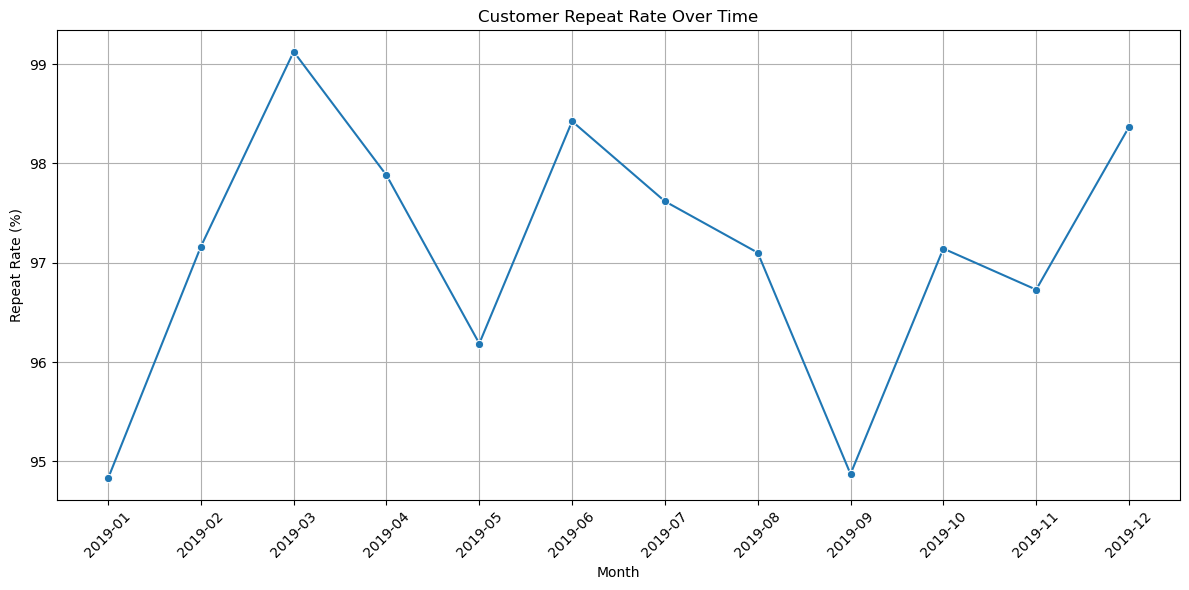

In [66]:
# Convert 'Transaction_Date' to datetime format
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])

# Extract 'Year' and 'Month' to create a 'YearMonth' column
df['YearMonth'] = df['Transaction_Date'].dt.strftime('%Y-%m')

# Calculate the repeat rate
def calculate_repeat_rate(df):
    first_purchase = df.groupby('CustomerID')['Transaction_Date'].min()
    repeat_customers = (first_purchase < df['Transaction_Date'].max()).sum()
    total_customers = df['CustomerID'].nunique()
    return repeat_customers / total_customers * 100

repeat_rate = df.groupby('YearMonth').apply(calculate_repeat_rate).reset_index()
repeat_rate.columns = ['Month', 'Repeat_Rate']


# Plot repeat rate
plt.figure(figsize=(12, 6))
sns.lineplot(data=repeat_rate, x='Month', y='Repeat_Rate', marker='o')
plt.xlabel('Month')
plt.ylabel('Repeat Rate (%)')
plt.title('Customer Repeat Rate Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# Compare revenues from existing and new customers on a monthly basis to assess customer loyalty and identify growth opportunities.

   YearMonth Customer_Type  Invoice_Value
0    2019-01      Existing   3.583078e+06
1    2019-01           New   3.350902e+05
2    2019-02      Existing   6.978291e+06
3    2019-02           New   6.985925e+04
4    2019-03      Existing   1.181862e+07
5    2019-03           New   6.666264e+04
6    2019-04      Existing   3.826641e+06
7    2019-04           New   1.850413e+04
8    2019-05      Existing   7.694282e+06
9    2019-06      Existing   1.170694e+07
10   2019-06           New   2.496719e+04
11   2019-07      Existing   4.149751e+06
12   2019-08      Existing   7.628104e+06
13   2019-08           New   9.731070e+03
14   2019-09      Existing   1.212182e+07
15   2019-09           New   3.895235e+04
16   2019-10      Existing   3.800807e+06
17   2019-10           New   2.570100e+01
18   2019-11      Existing   1.027662e+07
19   2019-11           New   8.794724e+04
20   2019-12      Existing   1.410962e+07
21   2019-12           New   6.741657e+04


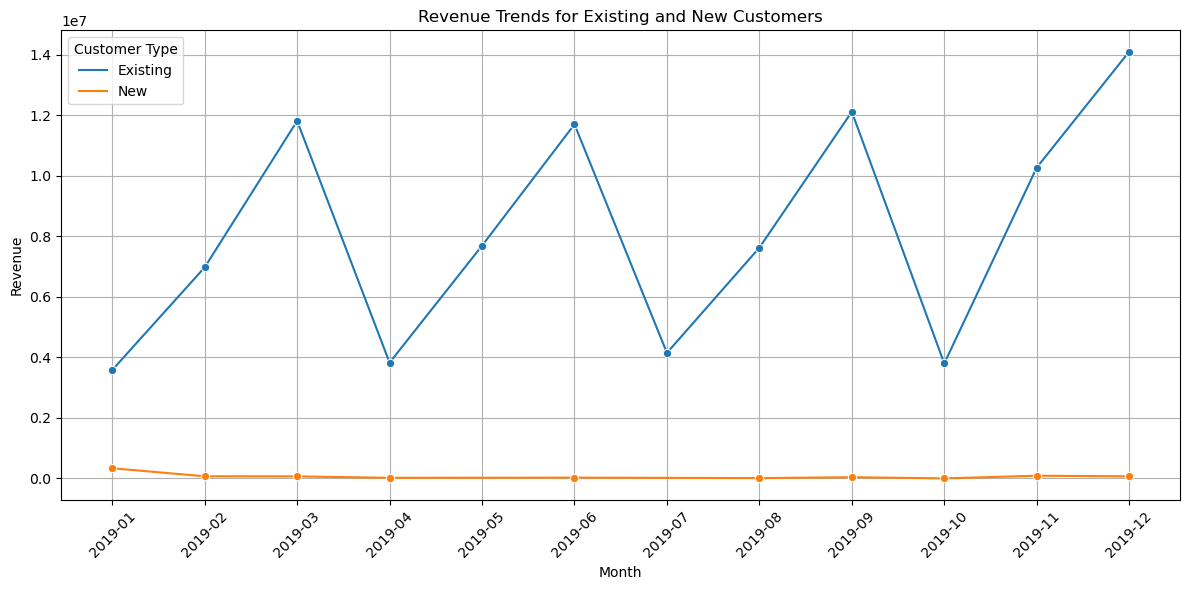

In [67]:
# Convert 'Transaction_Date' to datetime format
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])

# Extract 'Year' and 'Month' to create a 'YearMonth' column
df['YearMonth'] = df['Transaction_Date'].dt.strftime('%Y-%m')

# Create a column to label existing and new customers
df['Customer_Type'] = df.groupby('CustomerID',)['Transaction_Date'].transform(lambda x: 'New' if x.min() == df['Transaction_Date'].min() else 'Existing')

# Group data by 'YearMonth' and 'Customer_Type' to calculate revenue
revenue_data = df.groupby(['YearMonth', 'Customer_Type'])['Invoice_Value'].sum().reset_index()
print(revenue_data)
# Plot revenue trends for existing and new customers
plt.figure(figsize=(12, 6))
sns.lineplot(data=revenue_data, x='YearMonth', y='Invoice_Value', hue='Customer_Type', marker='o')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Revenue Trends for Existing and New Customers')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(title='Customer Type')
plt.show()


# Evaluate the impact of discounts on revenues by analyzing the relationship between discount coupons and sales.

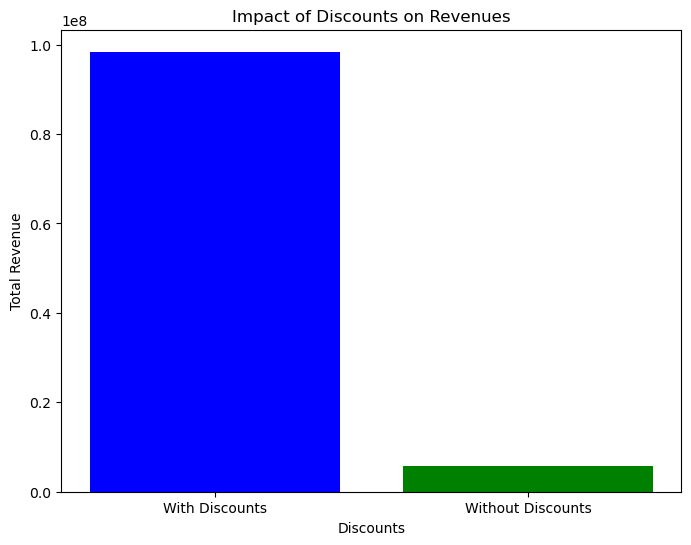

Percentage Change in Revenue due to Discounts: 1613.94%


In [68]:
# Calculate revenue with discounts
revenue_with_discounts = df['Invoice_Value'].sum()

# Calculate revenue without discounts (assuming no discounts)
revenue_without_discounts = df['Quantity'] * df['Avg_Price'] * (1 + df['GST']) + df['Delivery_Charges']
revenue_without_discounts = revenue_without_discounts.sum()

# Create a bar plot to compare revenue with and without discounts
plt.figure(figsize=(8, 6))
plt.bar(['With Discounts', 'Without Discounts'], [revenue_with_discounts, revenue_without_discounts], color=['blue', 'green'])
plt.xlabel('Discounts')
plt.ylabel('Total Revenue')
plt.title('Impact of Discounts on Revenues')
plt.show()

# Calculate the percentage change in revenue due to discounts
percentage_change = ((revenue_with_discounts - revenue_without_discounts) / revenue_without_discounts) * 100
print(f"Percentage Change in Revenue due to Discounts: {percentage_change:.2f}%")


# Explore key performance indicators (KPIs) such as revenue, number of orders, average order value, number of customers (existing/new), and quantity, by category, month, week, and day.

C:\Users\Asus\AppData\Local\Temp\ipykernel_11696\776663794.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['Week'] = df['Transaction_Date'].dt.week


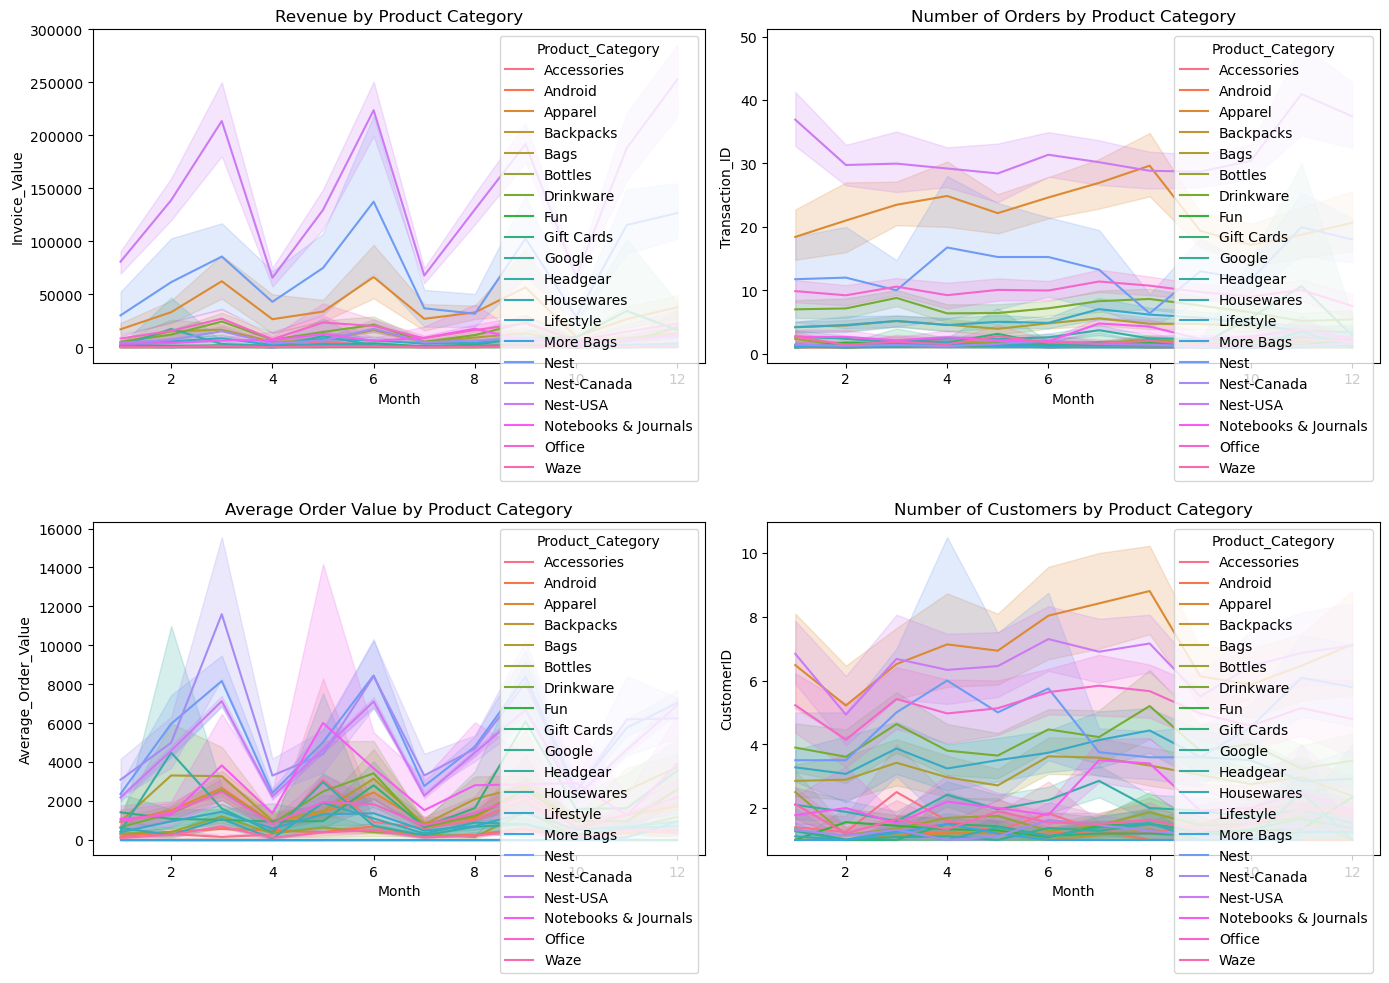

In [69]:
# Convert 'Transaction_Date' to datetime format
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])

# Extract 'Year', 'Month', 'Week', and 'Day' for segmentation
df['Year'] = df['Transaction_Date'].dt.year
df['Month'] = df['Transaction_Date'].dt.month
df['Week'] = df['Transaction_Date'].dt.week
df['Day'] = df['Transaction_Date'].dt.day

# Modify the code to use 'Product_Category' instead of 'Category'
kpi_data = df.groupby(['Product_Category', 'Year', 'Month', 'Week', 'Day']).agg({
    'Invoice_Value': 'sum',
    'Transaction_ID': 'nunique',
    'Quantity': 'sum',
    'CustomerID': 'nunique',
}).reset_index()
kpi_data['Average_Order_Value'] = kpi_data['Invoice_Value'] / kpi_data['Transaction_ID']

# Create subplots to visualize KPIs
plt.figure(figsize=(14, 10))

# Revenue by Category
plt.subplot(2, 2, 1)
sns.lineplot(data=kpi_data, x='Month', y='Invoice_Value', hue='Product_Category')
plt.title('Revenue by Product Category')

# Number of Orders by Category
plt.subplot(2, 2, 2)
sns.lineplot(data=kpi_data, x='Month', y='Transaction_ID', hue='Product_Category')
plt.title('Number of Orders by Product Category')

# Average Order Value by Category
plt.subplot(2, 2, 3)
sns.lineplot(data=kpi_data, x='Month', y='Average_Order_Value', hue='Product_Category')
plt.title('Average Order Value by Product Category')

# Number of Customers by Category
plt.subplot(2, 2, 4)
sns.lineplot(data=kpi_data, x='Month', y='CustomerID', hue='Product_Category')
plt.title('Number of Customers by Product Category')

plt.tight_layout()
plt.show()


# Identify sales trends and seasonality patterns by analyzing sales data based on categories, locations, and months.

    Product_Category YearMonth  Invoice_Value
0        Accessories   2019-01      2460.9790
1        Accessories   2019-02      1281.5850
2        Accessories   2019-03       756.6030
3        Accessories   2019-04      1662.3450
4        Accessories   2019-05     41264.0680
..               ...       ...            ...
231             Waze   2019-08     10169.9650
232             Waze   2019-09     11495.3146
233             Waze   2019-10      4337.3374
234             Waze   2019-11     25035.1786
235             Waze   2019-12     16928.6774

[236 rows x 3 columns]


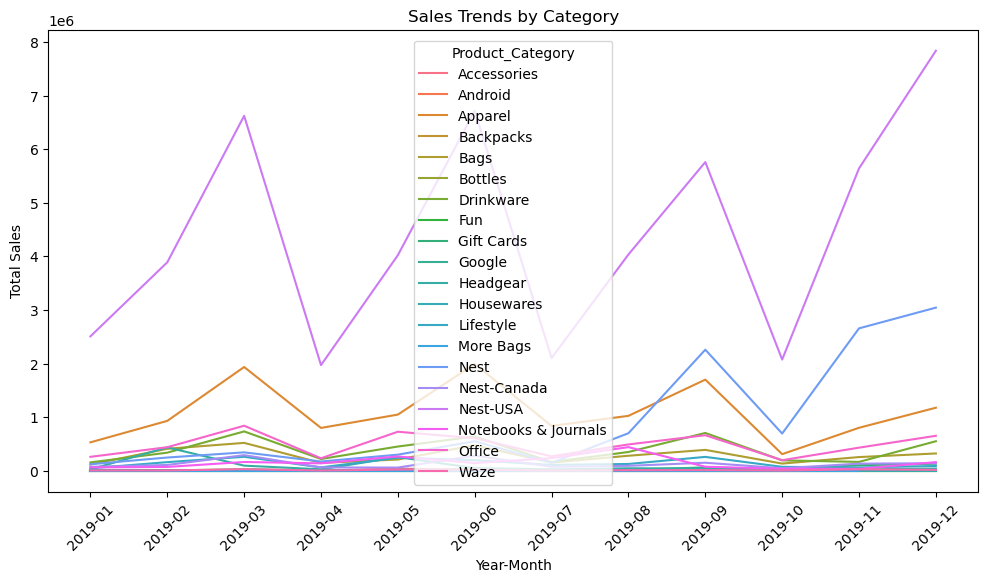

In [70]:
# Group data by category and month, summing up the Invoice_Value
category_month_sales = df.groupby(['Product_Category', 'YearMonth'])['Invoice_Value'].sum().reset_index()
print(category_month_sales)
# Create a line plot to visualize sales trends by category
plt.figure(figsize=(12, 6))
sns.lineplot(data=category_month_sales, x='YearMonth', y='Invoice_Value', hue='Product_Category')
plt.title('Sales Trends by Category')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


         Location YearMonth  Invoice_Value
0      California   2019-01   1.279756e+06
1      California   2019-02   2.264746e+06
2      California   2019-03   3.149843e+06
3      California   2019-04   1.380546e+06
4      California   2019-05   1.740458e+06
5      California   2019-06   3.466367e+06
6      California   2019-07   1.109393e+06
7      California   2019-08   2.463099e+06
8      California   2019-09   3.564379e+06
9      California   2019-10   1.196814e+06
10     California   2019-11   2.954517e+06
11     California   2019-12   5.857344e+06
12        Chicago   2019-01   1.212218e+06
13        Chicago   2019-02   2.680476e+06
14        Chicago   2019-03   3.904174e+06
15        Chicago   2019-04   1.391099e+06
16        Chicago   2019-05   3.248763e+06
17        Chicago   2019-06   4.059888e+06
18        Chicago   2019-07   1.481037e+06
19        Chicago   2019-08   2.814903e+06
20        Chicago   2019-09   4.284361e+06
21        Chicago   2019-10   1.094443e+06
22        C

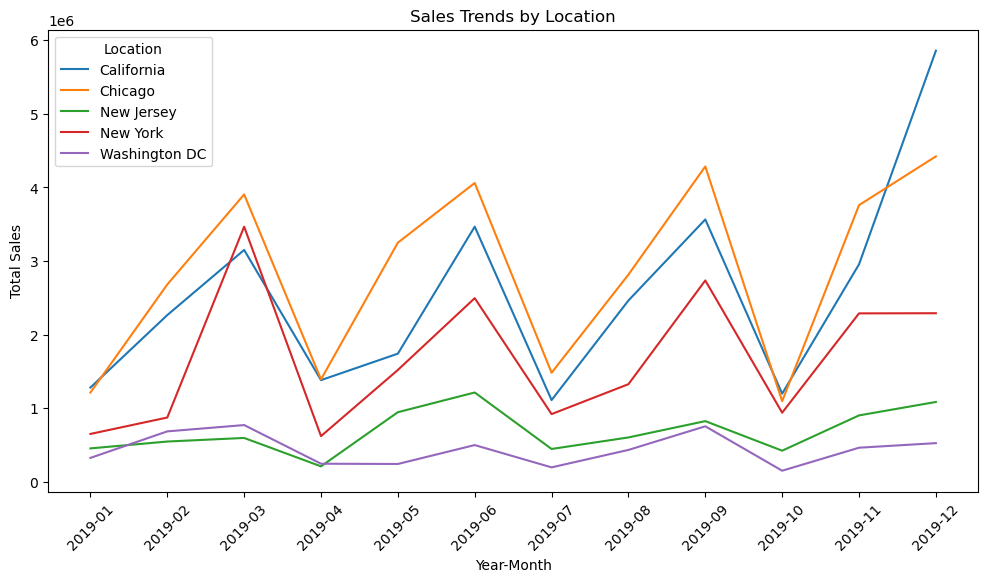

In [71]:
# Group data by location and month, summing up the Invoice_Value
location_month_sales = df.groupby(['Location', 'YearMonth'])['Invoice_Value'].sum().reset_index()
print(location_month_sales)
# Create a line plot to visualize sales trends by location
plt.figure(figsize=(12, 6))
sns.lineplot(data=location_month_sales, x='YearMonth', y='Invoice_Value', hue='Location')
plt.title('Sales Trends by Location')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


# Analyze the variation in the number of orders and sales across different days of the week.

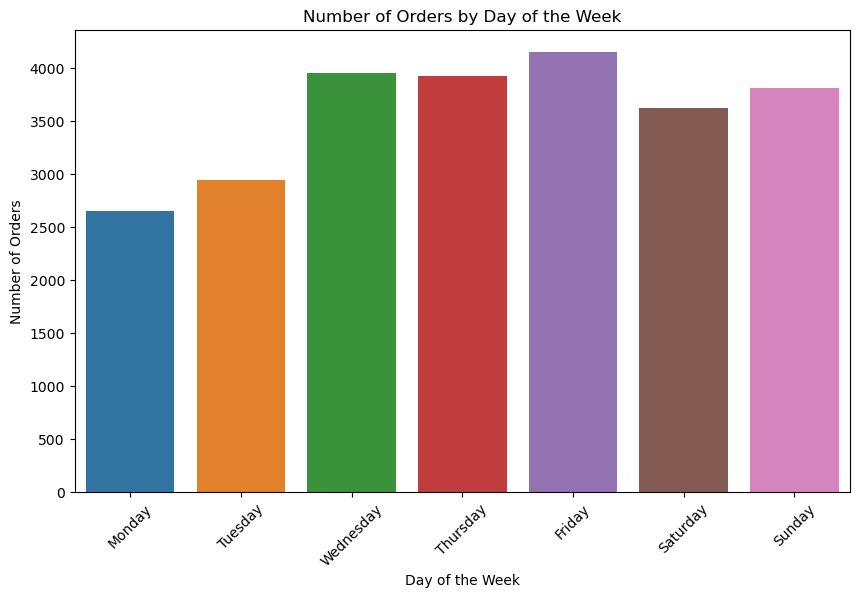

In [72]:
# Group data by day of the week and count the number of unique transactions
orders_by_day = df.groupby(df['Transaction_Date'].dt.day_name())['Transaction_ID'].nunique().reset_index()

# Sort the days of the week in the correct order
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
orders_by_day['Transaction_Date'] = pd.Categorical(orders_by_day['Transaction_Date'], categories=days_order, ordered=True)

# Create a bar plot to visualize the number of orders by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(data=orders_by_day, x='Transaction_Date', y='Transaction_ID')
plt.title('Number of Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()


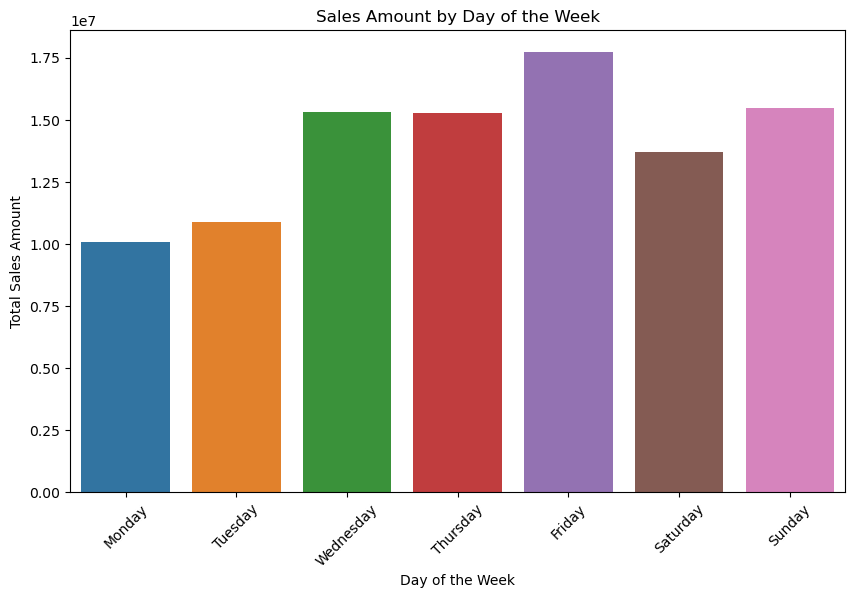

In [73]:
# Group data by day of the week and sum the Invoice_Value
sales_by_day = df.groupby(df['Transaction_Date'].dt.day_name())['Invoice_Value'].sum().reset_index()

# Sort the days of the week in the correct order
sales_by_day['Transaction_Date'] = pd.Categorical(sales_by_day['Transaction_Date'], categories=days_order, ordered=True)

# Create a bar plot to visualize the sales amount by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_by_day, x='Transaction_Date', y='Invoice_Value')
plt.title('Sales Amount by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()


# Calculate revenue, marketing spend, the percentage of marketing spend out of revenue, tax, and the percentage of delivery charges by month.

In [74]:
# Calculate revenue by month
revenue_by_month = df.groupby('YearMonth')['Invoice_Value'].sum().reset_index()

# Replace 'marketing_df' with the actual name of your DataFrame containing marketing spend data
marketing_spend_by_month = df.groupby('YearMonth')['Offline_Spend', 'Online_Spend'].sum().reset_index()

# Calculate tax by month
tax_by_month = df.groupby('YearMonth')['GST'].sum().reset_index()

# Calculate delivery charges by month
delivery_charges_by_month = df.groupby('YearMonth')['Delivery_Charges'].sum().reset_index()

# Merge all the data into one DataFrame
monthly_data = revenue_by_month.merge(marketing_spend_by_month, on='YearMonth', how='left')
monthly_data = monthly_data.merge(tax_by_month, on='YearMonth', how='left')
monthly_data = monthly_data.merge(delivery_charges_by_month, on='YearMonth', how='left')

# Calculate the percentage of marketing spend out of revenue
monthly_data['Marketing_Spend_Percentage'] = ((monthly_data['Offline_Spend'] + monthly_data['Online_Spend']) / monthly_data['Invoice_Value']) * 100

# Calculate the percentage of delivery charges out of revenue
monthly_data['Delivery_Charges_Percentage'] = (monthly_data['Delivery_Charges'] / monthly_data['Invoice_Value']) * 100

# Print or display the resulting DataFrame
print(monthly_data)


   YearMonth  Invoice_Value  Offline_Spend  Online_Spend     GST  \
0    2019-01   3.918168e+06       13003400    8111529.14  563.29   
1    2019-02   7.048150e+06       10518000    7223797.94  498.13   
2    2019-03   1.188528e+07       10724000    7161653.86  635.29   
3    2019-04   3.845145e+06       13603500    8569901.55  595.42   
4    2019-05   7.694282e+06        9207500    7473673.15  605.86   
5    2019-06   1.173190e+07       11931000    8001471.13  628.66   
6    2019-07   4.149751e+06       12091500    9725249.67  796.79   
7    2019-08   7.637835e+06       14862000    9615370.39  756.50   
8    2019-09   1.216077e+07       11539000    7119268.50  565.22   
9    2019-10   3.800833e+06       12220000    7626431.31  539.24   
10   2019-11   1.036457e+07       14152500   10155907.08  551.19   
11   2019-12   1.417703e+07       16836500   10777414.76  539.44   

    Delivery_Charges  Marketing_Spend_Percentage  Delivery_Charges_Percentage  
0           53423.20               

C:\Users\Asus\AppData\Local\Temp\ipykernel_11696\2540436374.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  marketing_spend_by_month = df.groupby('YearMonth')['Offline_Spend', 'Online_Spend'].sum().reset_index()


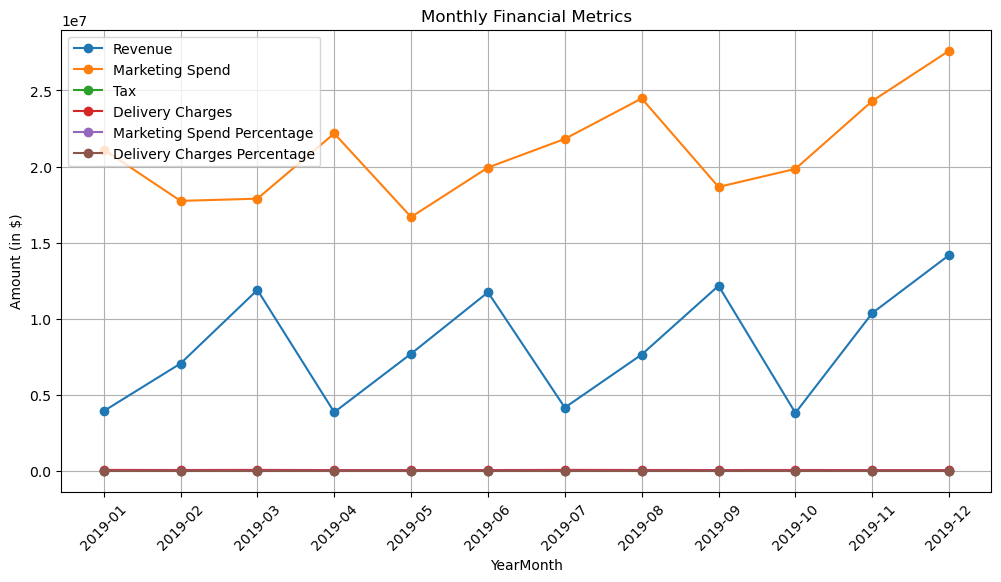

In [75]:
# Plot Revenue
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['YearMonth'], monthly_data['Invoice_Value'], label='Revenue', marker='o')

# Plot Marketing Spend
plt.plot(monthly_data['YearMonth'], monthly_data['Offline_Spend'] + monthly_data['Online_Spend'], label='Marketing Spend', marker='o')

# Plot Tax
plt.plot(monthly_data['YearMonth'], monthly_data['GST'], label='Tax', marker='o')

# Plot Delivery Charges
plt.plot(monthly_data['YearMonth'], monthly_data['Delivery_Charges'], label='Delivery Charges', marker='o')

# Plot Marketing Spend Percentage
plt.plot(monthly_data['YearMonth'], monthly_data['Marketing_Spend_Percentage'], label='Marketing Spend Percentage', marker='o')

# Plot Delivery Charges Percentage
plt.plot(monthly_data['YearMonth'], monthly_data['Delivery_Charges_Percentage'], label='Delivery Charges Percentage', marker='o')

plt.title('Monthly Financial Metrics')
plt.xlabel('YearMonth')
plt.ylabel('Amount (in $)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


# How marketing spend is impacting on revenue?

Correlation between Marketing Spend and Revenue: 0.1654856528122949


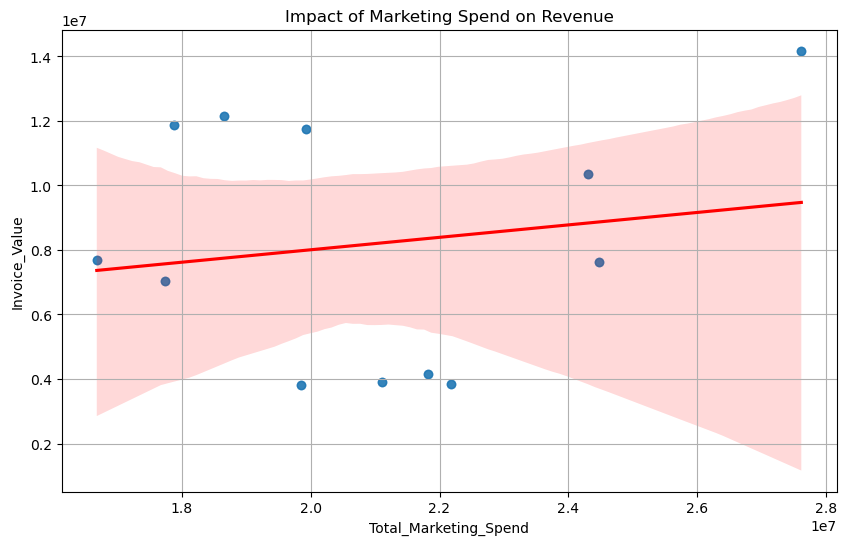

In [76]:
# Extract relevant columns
monthly_data = monthly_data[['YearMonth', 'Invoice_Value', 'Offline_Spend', 'Online_Spend']]

# Calculate the total marketing spend
monthly_data['Total_Marketing_Spend'] = monthly_data['Offline_Spend'] + monthly_data['Online_Spend']

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(monthly_data['Total_Marketing_Spend'], monthly_data['Invoice_Value'], marker='o', alpha=0.5)
plt.title('Impact of Marketing Spend on Revenue')
plt.xlabel('Total Marketing Spend')
plt.ylabel('Revenue')
plt.grid(True)

# Calculate and display the correlation
correlation = np.corrcoef(monthly_data['Total_Marketing_Spend'], monthly_data['Invoice_Value'])[0, 1]
print(f'Correlation between Marketing Spend and Revenue: {correlation}')

# Optionally, you can create a regression line to visualize the trend
sns.regplot(x='Total_Marketing_Spend', y='Invoice_Value', data=monthly_data, line_kws={'color': 'red'})

# Show the plot
plt.show()


The correlation coefficient of approximately 0.165 suggests a relatively weak positive correlation between marketing spend and revenue. This means that there is some degree of relationship between marketing spend and revenue, but it's not very strong.

In other words, an increase in marketing spend tends to be associated with a slight increase in revenue, but the relationship is not highly pronounced. Other factors might also be influencing revenue.

When interpreting this correlation, it's essential to consider other variables and factors that might impact revenue, such as market conditions, customer behavior, product quality, and more. This information can help you make informed decisions about your marketing strategies and their impact on revenue.

# Which product was appeared in the transactions?

In [77]:
# Get unique product SKUs
unique_products = df['Product_SKU'].unique()

# Print the list of unique product SKUs
print(unique_products)


['GGOENEBJ079499' 'GGOEGFKQ020399' 'GGOEGAAB010516' ... 'GGOEGDHQ086199'
 'GGOEGDWQ087699' 'GGOEGOCJ093999']


# Which product was purchased mostly based on the quantity?

In [78]:
# Group data by product SKU and calculate total quantity
product_quantity = df.groupby('Product_SKU')['Quantity'].sum()

# Find the product with the highest quantity
most_purchased_product = product_quantity.idxmax()
max_quantity = product_quantity.max()

print("Product SKU with the most purchases:", most_purchased_product)
print("Quantity purchased:", max_quantity)


Product SKU with the most purchases: GGOEGGOA017399
Quantity purchased: 16234


# Identify the most frequently purchased products based on transaction data and quantity.

In [79]:
# Group by 'Product_Description' and sum the quantities
product_quantity = df.groupby('Product_Description')['Quantity'].sum().reset_index()

# Sort the products by quantity in descending order to find the most frequently purchased ones
most_frequent_products = product_quantity.sort_values(by='Quantity', ascending=False)

# Display the top N most frequently purchased products, e.g., top 10
top_n = 10
most_frequent_products.head(top_n)


,Product_Description,Quantity
301,Maze Pen,16234
101,Google 22 oz Water Bottle,14282
212,Google Sunglasses,11452
340,Sport Bag,7321
192,Google Metallic Notebook Set,6496
140,Google Laptop and Cell Phone Stickers,5847
137,Google Kick Ball,5549
329,Recycled Paper Journal Set,5381
312,Nest Cam Outdoor Security Camera - USA,5206
90,Foam Can and Bottle Cooler,5098


# Perform Customer Segmentation:

Utilize heuristic segmentation based on customer value, RFM (Recency, Frequency, Monetary) analysis, to divide customers into segments such as Premium, Gold, Silver, and Standard.



In [80]:

# Convert 'Transaction_Date' to datetime
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])

# Calculate RFM values for each customer
snapshot_date = df['Transaction_Date'].max()  # Choose the most recent date as the snapshot date

rfm = df.groupby('CustomerID').agg({
    'Transaction_Date': lambda x: (snapshot_date - x.max()).days,  # Recency
    'Transaction_ID': 'count',  # Frequency
    'Invoice_Value': 'sum'  # Monetary Value
})

# Rename the columns
rfm.rename(columns={
    'Transaction_Date': 'Recency',
    'Transaction_ID': 'Frequency',
    'Invoice_Value': 'Monetary'
}, inplace=True)



# Define quantiles for Recency, Frequency, and Monetary
quantiles = rfm.quantile(q=[0.25, 0.5, 0.75])

# Define functions to segment customers based on quantiles
def r_score(x):
    if x <= quantiles['Recency'][0.25]:
        return 4
    elif x <= quantiles['Recency'][0.5]:
        return 3
    elif x <= quantiles['Recency'][0.75]:
        return 2
    else:
        return 1

def fm_score(x, c):
    if x <= quantiles[c][0.25]:
        return 1
    elif x <= quantiles[c][0.5]:
        return 2
    elif x <= quantiles[c][0.75]:
        return 3
    else:
        return 4

# Create RFM segments
rfm['R_Score'] = rfm['Recency'].apply(r_score)
rfm['F_Score'] = rfm['Frequency'].apply(fm_score, args=('Frequency',))
rfm['M_Score'] = rfm['Monetary'].apply(fm_score, args=('Monetary',))

# Calculate RFM Score
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

# Define segment labels based on RFM Score
segment_labels = {
    '111': 'Low Value',
    '144': 'High Value',
    '444': 'Highest Value',
    '211': 'Low Recency, Low Frequency, High Monetary',
    '344': 'High Recency, Low Frequency, Low Monetary',
    '124': 'Low Recency, High Frequency, Low Monetary',
    '244': 'High Recency, High Frequency, Low Monetary',
    '122': 'Low Recency, High Frequency, High Monetary',
    '222': 'Medium Recency, Medium Frequency, Medium Monetary',
    '322': 'High Recency, Medium Frequency, Medium Monetary',
    '411': 'Low Recency, Low Frequency, Low Monetary',
    '333': 'Medium Recency, High Frequency, High Monetary',
    '433': 'High Recency, High Frequency, High Monetary',
}

# Map RFM Score to segment labels
rfm['Segment'] = rfm['RFM_Score'].map(segment_labels)

# Print the resulting DataFrame with RFM values and segments
print(rfm[['Recency', 'Frequency', 'Monetary', 'RFM_Score', 'Segment']])


            Recency  Frequency     Monetary RFM_Score  \
CustomerID                                              
12346           107          2    1184.9578       311   
12347           282         60  432198.9110       144   
12348            73         23   32645.8892       332   
12350            17         17   43869.5718       423   
12356           107         36   46870.1542       333   
...             ...        ...          ...       ...   
18259           241          7   11193.1060       111   
18260            53         40   63513.3084       333   
18269           194          8    2496.9836       211   
18277            69          1    2956.2000       311   
18283            82        102   63072.4727       343   

                                                  Segment  
CustomerID                                                 
12346                                                 NaN  
12347                                          High Value  
12348             

The RFM values and segments have been successfully calculated for each customer. Here's a brief explanation of the columns:

Recency: The number of days since the customer's last transaction.
Frequency: The total number of transactions made by the customer.
Monetary: The total monetary value of transactions made by the customer.
RFM_Score: A combined score based on Recency, Frequency, and Monetary values. It's a string that represents the scores for each dimension (R, F, M).
Segment: The segment label assigned based on the RFM_Score. Segments like "High Value" and "Low Value" have been assigned to customers.
Please note that some customers have NaN (Not a Number) values in the "Segment" column. This is because the rules and segment labels defined for the RFM_Score may not cover all possible combinations. You can further refine your segmentation rules to cover these cases or manually assign them to specific segments based on your business knowledge.

Overall, this segmentation provides a way to categorize customers based on their transaction behavior, which can be used for targeted marketing and engagement strategies.

In [81]:
# Calculate Recency, Frequency, and Monetary values
snapshot_date = pd.to_datetime('2019-12-31')  # Choose a snapshot date
df['Recency'] = (snapshot_date - df.groupby('CustomerID')['Transaction_Date'].max()).dt.days
df['Frequency'] = df.groupby('CustomerID')['Transaction_Date'].count()
df['Monetary'] = df.groupby('CustomerID')['Invoice_Value'].sum()

# Assign RFM scores (e.g., on a scale of 1 to 5)
df['R_Score'] = pd.qcut(df['Recency'], 5, labels=[5, 4, 3, 2, 1])
df['F_Score'] = pd.qcut(df['Frequency'], 5, labels=[1, 2, 3, 4, 5])
df['M_Score'] = pd.qcut(df['Monetary'], 5, labels=[1, 2, 3, 4, 5])

# Combine RFM scores to create RFM segments
df['RFM_Segment'] = df['R_Score'].astype(str) + df['F_Score'].astype(str) + df['M_Score'].astype(str)

# Define segment labels
segment_labels = {
    '555': 'Premium',
    '543': 'Gold',
    '432': 'Silver',
    '321': 'Standard',
    '111': 'Inactive'
}

# Map segment labels to RFM segments
df['RFM_Segment_Label'] = df['RFM_Segment'].map(segment_labels)

# Apply scientific segmentation techniques like K-means clustering to identify distinct customer profiles and develop tailored strategies for each segment.

In [82]:
# Drop rows with missing values in 'Coupon_Code' and 'Invoice_Value'
df = df.dropna(subset=['Coupon_Code', 'Invoice_Value'])

# Fill missing values in 'Recency', 'Frequency', 'Monetary', and 'Discounted_Revenue' with zeros
df['Recency'].fillna(0, inplace=True)
df['Frequency'].fillna(0, inplace=True)
df['Monetary'].fillna(0, inplace=True)

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

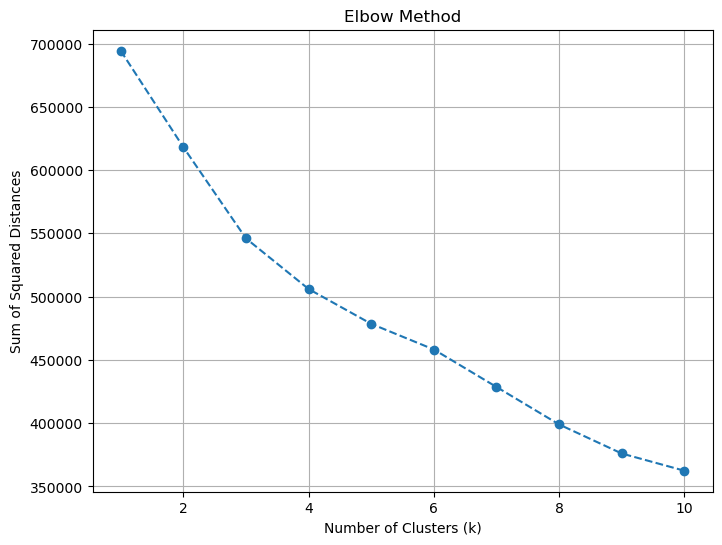

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [83]:

# A list of numeric and categorical columns
numeric_columns = ['Quantity', 'Avg_Price', 'Delivery_Charges', 'Discount_pct', 'Tenure_Months', 'GST', 'Offline_Spend', 'Online_Spend', 'Invoice_Value', 'Recency', 'Frequency', 'Monetary']
categorical_columns = ['Gender', 'Location', 'Customer_Type']  # Replace with your actual categorical columns

# Separate the numeric and categorical data
numeric_data = df[numeric_columns]
categorical_data = df[categorical_columns]

# Preprocess numeric data
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preprocess categorical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Fit and transform the data
X = preprocessor.fit_transform(df)

# Determine the number of clusters using the Elbow Method
# Calculate the sum of squared distances for different values of k (number of clusters)
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Plot the Elbow curve to find the optimal number of clusters
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.grid(True)
plt.show()

# Based on the Elbow curve, select the optimal number of clusters (k)
k = 4

# Apply K-Means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Analyze and label segments based on cluster means
selected_columns = ['Recency', 'Frequency', 'Monetary']  # Replace with the columns you want to analyze
cluster_means = df.groupby('Cluster')[selected_columns].mean()


In [84]:
cluster_means

,Recency,Frequency,Monetary
Cluster,,,
0,0.893424,0.426304,550.654213
1,0.405086,0.077870,162.053891
2,0.587642,0.138441,250.543467
3,177.317194,45.649209,84842.278301


# Define strategies for each segment based on their profiles




Certainly, here are some strategies tailored to each customer segment based on their RFM profiles:

Cluster 0: High-Value, Active Customers

Retention and Loyalty: These customers are already valuable and active. Focus on retaining them by offering loyalty rewards programs, exclusive discounts, and early access to new products or services. Make them feel appreciated.

Cross-Selling and Upselling: Since they are active, leverage this by cross-selling related products or upselling higher-value items. Provide personalized recommendations based on their past purchases.

Feedback and Engagement: Engage with them through surveys or feedback requests to understand their preferences better. Use this information to tailor your offerings and improve their overall experience.

Cluster 1: Recent but Low-Activity Customers

Reactivation Campaigns: Encourage these customers to make more frequent purchases by sending them reactivation campaigns. Offer time-limited discounts or promotions to entice them back.

Personalized Recommendations: Use their past purchase history to provide personalized product recommendations. Show them the value of being more active.

Engagement: Keep them engaged with your brand through content marketing, newsletters, or social media. Share informative and interesting content related to your products.

Cluster 2: Moderate Activity Customers

Repeat Purchase Incentives: These customers are somewhat active. Offer incentives such as loyalty points or discounts for repeat purchases within a specific timeframe.

Segmented Promotions: Segment this group based on their preferences and purchase history. Send targeted promotions for products they are likely to be interested in.

Feedback Loop: Encourage feedback and reviews. Use this to improve their experience and build trust.

Cluster 3: Extremely High-Value Customers

VIP Treatment: Treat these customers as VIPs. Offer exclusive benefits, such as priority customer support, early access to products, or dedicated account managers.

Tailored Products and Services: Consider offering bespoke or premium products/services for this segment. They are willing to pay for exclusivity.

Personalized Communication: Communicate with them personally. Understand their individual needs and preferences. Send personalized offers and recommendations.

Remember that these strategies are general guidelines, and you should adapt them to your specific industry, product offerings, and customer behaviors. Regularly analyze the effectiveness of these strategies and be flexible in adjusting them as customer preferences and market conditions change. Customer segmentation and strategy refinement should be an ongoing process.


In [85]:
# Strategy for Cluster 0: High-Value, Active Customers
cluster_0 = df[df['Cluster'] == 0]
# Implement strategies specific to Cluster 0

# Strategy for Cluster 1: Recent but Low-Activity Customers
cluster_1 = df[df['Cluster'] == 1]
# Implement strategies specific to Cluster 1

# Strategy for Cluster 2: Moderate Activity Customers
cluster_2 = df[df['Cluster'] == 2]
# Implement strategies specific to Cluster 2

# Strategy for Cluster 3: Extremely High-Value Customers
cluster_3 = df[df['Cluster'] == 3]
# Implement strategies specific to Cluster 3


In [86]:
cluster_0

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,Day,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Segment_Label,Cluster
317,13448,16905,2019-03-01,GGOEGOAQ012899,Ballpoint LED Light Pen,Office,62,2.00,122.74,Clicked,...,1,0.0,0.0,0.0,NaN,NaN,NaN,nannannan,NaN,0
318,15862,16905,2019-03-01,GGOEGOCC077299,Google RFID Journal,Notebooks & Journals,62,15.96,122.74,Used,...,1,0.0,0.0,0.0,NaN,NaN,NaN,nannannan,NaN,0
324,15862,16909,2019-03-01,GGOEADHH055999,22 oz Android Bottle,Bottles,62,2.39,210.44,Clicked,...,1,0.0,0.0,0.0,NaN,NaN,NaN,nannannan,NaN,0
325,15862,16909,2019-03-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,12,13.19,210.44,Clicked,...,1,0.0,0.0,0.0,NaN,NaN,NaN,nannannan,NaN,0
326,15862,16909,2019-03-01,GGOEGBMJ013399,Sport Bag,Bags,62,3.98,210.44,Clicked,...,1,0.0,0.0,0.0,NaN,NaN,NaN,nannannan,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50806,17337,46909,2019-12-14,GGOEGOLC014299,Google Metallic Notebook Set,Office,235,4.80,39.86,Clicked,...,14,0.0,0.0,0.0,NaN,NaN,NaN,nannannan,NaN,0
50807,17337,46910,2019-12-14,GGOEGOLC014299,Google Metallic Notebook Set,Office,236,4.80,40.29,Used,...,14,0.0,0.0,0.0,NaN,NaN,NaN,nannannan,NaN,0
50913,17337,46976,2019-12-15,GGOEGDHC087099,Google Thermal Bottle Blue,Drinkware,102,19.18,68.82,Clicked,...,15,0.0,0.0,0.0,NaN,NaN,NaN,nannannan,NaN,0
50914,17337,46976,2019-12-15,GGOEGDHR086999,Google Thermal Bottle Red,Drinkware,102,19.18,68.82,Not Used,...,15,0.0,0.0,0.0,NaN,NaN,NaN,nannannan,NaN,0


In [87]:
cluster_1

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,Day,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Segment_Label,Cluster
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,...,1,0.0,0.0,0.0,NaN,NaN,NaN,nannannan,NaN,1
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.50,Used,...,1,0.0,0.0,0.0,NaN,NaN,NaN,nannannan,NaN,1
13,13047,16684,2019-01-01,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,2,122.77,6.50,Clicked,...,1,0.0,0.0,0.0,NaN,NaN,NaN,nannannan,NaN,1
14,13047,16684,2019-01-01,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,1,81.50,6.50,Used,...,1,0.0,0.0,0.0,NaN,NaN,NaN,nannannan,NaN,1
24,13047,16688,2019-01-01,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,122.77,6.50,Used,...,1,0.0,0.0,0.0,NaN,NaN,NaN,nannannan,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52918,14410,48492,2019-12-31,GGOENEBQ086799,Nest Thermostat E - USA,Nest,3,100.91,6.50,Clicked,...,31,0.0,0.0,0.0,NaN,NaN,NaN,nannannan,NaN,1
52919,14410,48493,2019-12-31,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,121.30,6.50,Clicked,...,31,0.0,0.0,0.0,NaN,NaN,NaN,nannannan,NaN,1
52921,14410,48495,2019-12-31,GGOENEBQ084699,Nest Learning Thermostat 3rd Gen-USA - White,Nest-USA,1,151.88,6.50,Used,...,31,0.0,0.0,0.0,NaN,NaN,NaN,nannannan,NaN,1
52922,14600,48496,2019-12-31,GGOENEBQ079199,Nest Protect Smoke + CO White Wired Alarm-USA,Nest-USA,5,80.52,6.50,Clicked,...,31,0.0,0.0,0.0,NaN,NaN,NaN,nannannan,NaN,1


In [88]:
cluster_2

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,Day,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Segment_Label,Cluster
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,...,1,0.0,0.0,0.0,NaN,NaN,NaN,nannannan,NaN,2
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,...,1,0.0,0.0,0.0,NaN,NaN,NaN,nannannan,NaN,2
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,...,1,0.0,0.0,0.0,NaN,NaN,NaN,nannannan,NaN,2
5,17850,16682,2019-01-01,GGOEGBMJ013399,Sport Bag,Bags,15,5.15,6.5,Used,...,1,0.0,0.0,0.0,NaN,NaN,NaN,nannannan,NaN,2
6,17850,16682,2019-01-01,GGOEGDHC018299,Google 22 oz Water Bottle,Drinkware,15,3.08,6.5,Not Used,...,1,0.0,0.0,0.0,NaN,NaN,NaN,nannannan,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52906,12956,48482,2019-12-31,GGOEGAEJ028116,Google Women's Short Sleeve Badge Tee Grey,Apparel,4,3.47,6.5,Clicked,...,31,0.0,0.0,0.0,NaN,NaN,NaN,nannannan,NaN,2
52907,12956,48482,2019-12-31,GGOEGAEQ027917,Google Women's Short Sleeve Hero Tee White,Apparel,4,3.47,6.5,Used,...,31,0.0,0.0,0.0,NaN,NaN,NaN,nannannan,NaN,2
52911,15781,48489,2019-12-31,GGOEGAEQ027917,Google Women's Short Sleeve Hero Tee White,Apparel,1,3.47,6.5,Used,...,31,0.0,0.0,0.0,NaN,NaN,NaN,nannannan,NaN,2
52912,15781,48489,2019-12-31,GGOEGAXB089228,Google Trike Tee Black,Apparel,1,16.30,6.5,Used,...,31,0.0,0.0,0.0,NaN,NaN,NaN,nannannan,NaN,2


In [89]:
cluster_3

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,Day,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Segment_Label,Cluster
12347,13523,24935,2019-06-04,GGOENEBB078899,Nest Cam Indoor Security Camera - USA,Nest-USA,1,119.00,6.50,Used,...,4,282.0,60.0,432198.9110,1,5,5,155,NaN,3
12356,15005,24941,2019-06-04,GGOEYFKQ020699,YouTube Custom Decals,Office,1,1.99,6.50,Clicked,...,4,107.0,36.0,46870.1542,3,4,3,343,NaN,3
12370,15005,24945,2019-06-04,GGOEGAPB057815,Women's Performance Full Zip Jacket Black,Apparel,1,67.19,6.50,Not Used,...,4,189.0,91.0,152762.2470,2,5,5,255,NaN,3
12373,15005,24948,2019-06-04,GGOEGAAB033815,Google Men's Vintage Badge Tee Black,Apparel,1,15.19,6.50,Used,...,4,172.0,14.0,4845.6828,2,2,1,221,NaN,3
12377,15005,24950,2019-06-04,GGOEGHGC019799,Google Sunglasses,Lifestyle,1,3.50,6.50,Used,...,4,40.0,77.0,204692.7256,4,5,5,455,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18256,16726,28154,2019-05-16,GGOEGBMJ013399,Sport Bag,Bags,20,3.99,21.71,Clicked,...,16,238.0,4.0,1133.7184,2,1,1,211,NaN,3
18259,16726,28154,2019-05-16,GGOEGOCC017599,Recycled Paper Journal Set,Office,5,3.19,21.71,Clicked,...,16,241.0,7.0,11193.1060,2,1,2,212,NaN,3
18260,16726,28154,2019-05-16,GGOEGOCR017899,Recycled Paper Journal Set,Office,5,3.19,21.71,Clicked,...,16,53.0,40.0,63513.3084,4,4,4,444,NaN,3
18269,14085,28158,2019-05-16,GGOEGFYQ016599,Foam Can and Bottle Cooler,Drinkware,10,1.59,6.50,Clicked,...,16,194.0,8.0,2496.9836,2,1,1,211,NaN,3


# 4.	Predicting Customer Lifetime Value (Low Value/Medium Value/High Value)
•	First define dependent variable with categories low value, medium value, high value using customer revenue.
•	Then perform Classification model


In [90]:
import pandas as pd

# Define a function to categorize CLV
def categorize_clv(revenue):
    if revenue < low_threshold:
        return 'Low Value'
    elif low_threshold <= revenue < high_threshold:
        return 'Medium Value'
    else:
        return 'High Value'

# Set revenue thresholds for categorization
low_threshold = 100  # Define your threshold values
high_threshold = 500

# Assuming you have a DataFrame named 'customer_data' with an 'Invoice_Value' column
df['CLV_Segment'] = df['Invoice_Value'].apply(categorize_clv)


In [91]:
df.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Month', 'Coupon_Code',
       'Discount_pct', 'Gender', 'Location', 'Tenure_Months', 'GST', 'Date',
       'Offline_Spend', 'Online_Spend', 'Invoice_Value', 'YearMonth',
       'Customer_Type', 'Year', 'Week', 'Day', 'Recency', 'Frequency',
       'Monetary', 'R_Score', 'F_Score', 'M_Score', 'RFM_Segment',
       'RFM_Segment_Label', 'Cluster', 'CLV_Segment'],
      dtype='object')

In [92]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler



# Feature engineering

# Calculate the average time between purchases for each customer
df['Avg_Days_Between_Purchases'] = df.groupby('CustomerID')['Transaction_Date'].diff().dt.days.mean()


# Extract month, day of the week, and year from Transaction_Date
df['Month'] = df['Transaction_Date'].dt.month
df['DayOfWeek'] = df['Transaction_Date'].dt.dayofweek
df['Year'] = df['Transaction_Date'].dt.year

# Feature scaling
scaler = StandardScaler()
df['Avg_Days_Between_Purchases'] = scaler.fit_transform(df['Avg_Days_Between_Purchases'].values.reshape(-1, 1))

# Define your feature columns
features = ['Recency', 'Frequency', 'Avg_Days_Between_Purchases','Month', 'DayOfWeek', 'Year']

# Split your data into training and testing sets
X = df[features]
y = df['CLV_Segment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print("Model Accuracy:", accuracy)

# Hyperparameter tuning

# Define hyperparameters and perform a grid search
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model
best_accuracy = best_model.score(X_test, y_test)
print("Best Model Accuracy:", best_accuracy)
print("Best Hyperparameters:", grid_search.best_params_)


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Accuracy: 0.5520228462636839


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Best Model Accuracy: 0.5517372679676344
Best Hyperparameters: {'C': 0.1, 'solver': 'lbfgs'}


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [93]:
df.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Month', 'Coupon_Code',
       'Discount_pct', 'Gender', 'Location', 'Tenure_Months', 'GST', 'Date',
       'Offline_Spend', 'Online_Spend', 'Invoice_Value', 'YearMonth',
       'Customer_Type', 'Year', 'Week', 'Day', 'Recency', 'Frequency',
       'Monetary', 'R_Score', 'F_Score', 'M_Score', 'RFM_Segment',
       'RFM_Segment_Label', 'Cluster', 'CLV_Segment',
       'Avg_Days_Between_Purchases', 'DayOfWeek'],
      dtype='object')

# Cross-Selling Analysis:
Perform exploratory analysis and market basket analysis to understand which products are frequently bought together, enabling the creation of product bundles.

In [94]:
df.columns

Index(['CustomerID', 'Transaction_ID', 'Transaction_Date', 'Product_SKU',
       'Product_Description', 'Product_Category', 'Quantity', 'Avg_Price',
       'Delivery_Charges', 'Coupon_Status', 'Month', 'Coupon_Code',
       'Discount_pct', 'Gender', 'Location', 'Tenure_Months', 'GST', 'Date',
       'Offline_Spend', 'Online_Spend', 'Invoice_Value', 'YearMonth',
       'Customer_Type', 'Year', 'Week', 'Day', 'Recency', 'Frequency',
       'Monetary', 'R_Score', 'F_Score', 'M_Score', 'RFM_Segment',
       'RFM_Segment_Label', 'Cluster', 'CLV_Segment',
       'Avg_Days_Between_Purchases', 'DayOfWeek'],
      dtype='object')

In [95]:
import pandas as pd
import itertools 


# Group transactions by product and count the frequency of co-occurrence
co_occurrence = df.groupby('Transaction_ID')['Product_SKU'].apply(list).reset_index()
co_occurrence['Product_Pairs'] = co_occurrence['Product_SKU'].apply(lambda x: list(itertools.combinations(x, 2)))

# Count the frequency of each product pair
product_pairs = list(itertools.chain.from_iterable(co_occurrence['Product_Pairs']))
pair_counts = pd.Series(product_pairs).value_counts().reset_index()
pair_counts.columns = ['Product_Pair', 'Frequency']

# Sort product pairs by frequency
pair_counts.sort_values(by='Frequency', ascending=False, inplace=True)

# Display the most frequently co-occurring product pairs
print(pair_counts.head(50))


                        Product_Pair  Frequency
0   (GGOENEBB078899, GGOENEBQ078999)        693
1   (GGOENEBJ079499, GGOENEBQ078999)        301
2   (GGOEGHGC019799, GGOEGHGR019499)        267
3   (GGOEGHGH019699, GGOEGHGT019599)        242
4   (GGOEGHGR019499, GGOEGHGT019599)        236
5   (GGOEGHGC019799, GGOEGHGT019599)        235
6   (GGOEGHGH019699, GGOEGHGR019499)        233
7   (GGOEGHGC019799, GGOEGHGH019699)        233
8   (GGOENEBB078899, GGOENEBJ079499)        228
9   (GGOENEBJ079499, GGOENEBQ079099)        226
10  (GGOEGDHC018299, GGOEGDHR018499)        218
11  (GGOENEBQ078999, GGOENEBQ079099)        192
12  (GGOENEBJ079499, GGOENEBQ079199)        181
13  (GGOENEBB078899, GGOENEBQ079099)        150
14  (GGOEGFKQ020399, GGOEYFKQ020699)        134
15  (GGOENEBQ078999, GGOENEBQ079199)        125
16  (GGOEGFKQ020399, GGOEGFKQ020799)        123
17  (GGOENEBQ079099, GGOENEBQ079199)        117
18  (GGOENEBQ078999, GGOENEBQ084699)        114
19  (GGOEAFKQ020599, GGOEGFKQ020399)    

In [96]:
from mlxtend.frequent_patterns import apriori, association_rules

# Create a one-hot encoded matrix of products
oht = (df.groupby(['Transaction_ID', 'Product_SKU'])['Quantity']
       .sum().unstack().reset_index().fillna(0)
       .set_index('Transaction_ID'))

# Convert quantities to binary values (0 or 1)
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = oht.applymap(encode_units)

# Apply the Apriori algorithm to find frequent item sets
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Sort the rules by lift
rules = rules.sort_values(by='lift', ascending=False)

# Display the top association rules
print(rules.head(10))


C:\Users\Asus\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


        antecedents       consequents  antecedent support  consequent support  \
0  (GGOEGHGC019799)  (GGOEGHGR019499)             0.01772             0.01468   
1  (GGOEGHGR019499)  (GGOEGHGC019799)             0.01468             0.01772   
3  (GGOENEBB078899)  (GGOENEBQ078999)             0.12920             0.13312   
2  (GGOENEBQ078999)  (GGOENEBB078899)             0.13312             0.12920   

   support  confidence       lift  leverage  conviction  zhangs_metric  
0  0.01068    0.602709  41.056458  0.010420    2.480095       0.993244  
1  0.01068    0.727520  41.056458  0.010420    3.604968       0.990179  
3  0.02772    0.214551   1.611712  0.010521    1.103675       0.435854  
2  0.02772    0.208233   1.611712  0.010521    1.099819       0.437825  


In [97]:
# Example association rules DataFrame
association_rules = pd.DataFrame({
    'antecedents': [('Product A', 'Product B'), ('Product C', 'Product D')],
    'consequents': [('Product X',), ('Product Y', 'Product Z')],
    'confidence': [0.7, 0.8]
})

# Define a function to create product bundles
def create_product_bundles(rules_df, min_confidence=0.7):
    # Filter rules based on minimum confidence
    filtered_rules = rules_df[rules_df['confidence'] >= min_confidence]
    
    # Initialize an empty dictionary to store bundles
    bundles = {}
    
    # Iterate through the filtered rules
    for index, row in filtered_rules.iterrows():
        antecedents = row['antecedents']
        consequents = row['consequents']
        
        # Check if the antecedents can be added to an existing bundle
        added_to_bundle = False
        for bundle_key, bundle_items in bundles.items():
            if all(item in bundle_items for item in antecedents):
                bundles[bundle_key].update(consequents)
                added_to_bundle = True
                break
        
        # If not added to an existing bundle, create a new bundle
        if not added_to_bundle:
            bundle_key = 'Bundle ' + str(len(bundles) + 1)
            bundles[bundle_key] = set(antecedents + consequents)
    
    return bundles

# Create product bundles from association rules
product_bundles = create_product_bundles(association_rules)

# Display the created product bundles
for bundle, items in product_bundles.items():
    print(f'{bundle}: {", ".join(items)}')


Bundle 1: Product B, Product X, Product A
Bundle 2: Product Y, Product C, Product D, Product Z


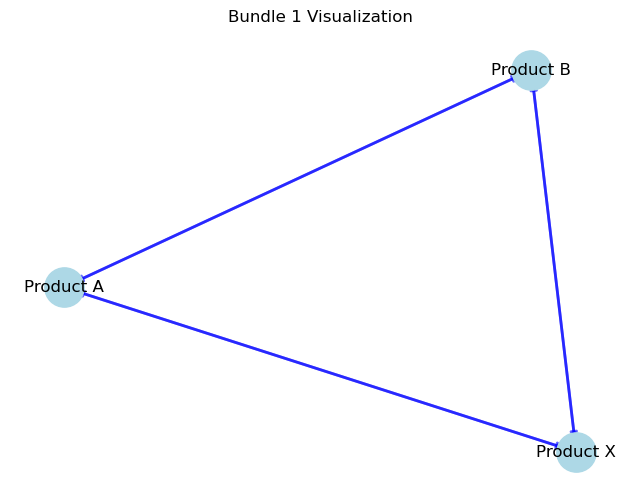

In [98]:
# Define the products in Bundle 1
bundle1_products = ['Product A', 'Product B', 'Product X']

# Create a directed graph
G_bundle1 = nx.DiGraph()

# Add nodes for each product in Bundle 1
for product in bundle1_products:
    G_bundle1.add_node(product)

# Add edges between products in Bundle 1
for product1 in bundle1_products:
    for product2 in bundle1_products:
        if product1 != product2:
            G_bundle1.add_edge(product1, product2)

# Define node positions for visualization
pos_bundle1 = nx.spring_layout(G_bundle1)

# Create a figure
plt.figure(figsize=(8, 6))

# Draw edges for Bundle 1
edges_bundle1 = G_bundle1.edges()
nx.draw_networkx_edges(G_bundle1, pos_bundle1, edgelist=edges_bundle1, width=2, alpha=0.6, edge_color='b')

# Draw nodes for Bundle 1
nx.draw_networkx_nodes(G_bundle1, pos_bundle1, node_size=800, node_color='lightblue')

# Add labels for products in Bundle 1
labels_bundle1 = {product: product for product in bundle1_products}
nx.draw_networkx_labels(G_bundle1, pos_bundle1, labels=labels_bundle1, font_size=12, font_family='sans-serif')

# Set plot title and show the graph for Bundle 1
plt.title('Bundle 1 Visualization')
plt.axis('off')
plt.show()


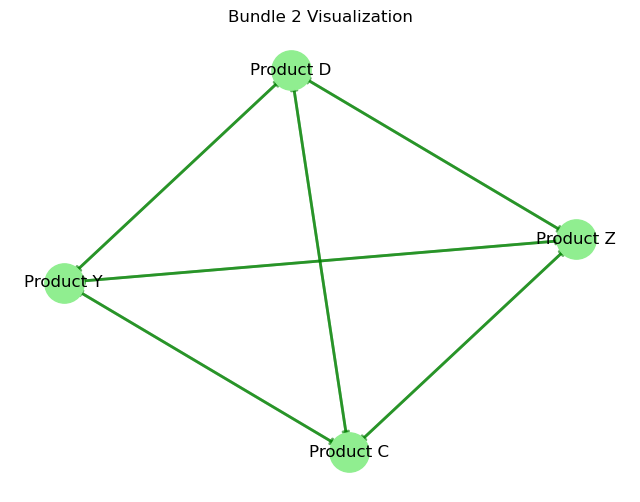

In [99]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the products in Bundle 2
bundle2_products = ['Product D', 'Product Y', 'Product Z', 'Product C']

# Create a directed graph
G_bundle2 = nx.DiGraph()

# Add nodes for each product in Bundle 2
for product in bundle2_products:
    G_bundle2.add_node(product)

# Add edges between products in Bundle 2
for product1 in bundle2_products:
    for product2 in bundle2_products:
        if product1 != product2:
            G_bundle2.add_edge(product1, product2)

# Define node positions for visualization
pos_bundle2 = nx.spring_layout(G_bundle2)

# Create a figure
plt.figure(figsize=(8, 6))

# Draw edges for Bundle 2
edges_bundle2 = G_bundle2.edges()
nx.draw_networkx_edges(G_bundle2, pos_bundle2, edgelist=edges_bundle2, width=2, alpha=0.6, edge_color='g')

# Draw nodes for Bundle 2
nx.draw_networkx_nodes(G_bundle2, pos_bundle2, node_size=800, node_color='lightgreen')

# Add labels for products in Bundle 2
labels_bundle2 = {product: product for product in bundle2_products}
nx.draw_networkx_labels(G_bundle2, pos_bundle2, labels=labels_bundle2, font_size=12, font_family='sans-serif')

# Set plot title and show the graph for Bundle 2
plt.title('Bundle 2 Visualization')
plt.axis('off')
plt.show()


In [100]:
df.head(10)

,CustomerID,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,Quantity,Avg_Price,Delivery_Charges,Coupon_Status,...,Monetary,R_Score,F_Score,M_Score,RFM_Segment,RFM_Segment_Label,Cluster,CLV_Segment,Avg_Days_Between_Purchases,DayOfWeek
0,17850,16679,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,0.0,NaN,NaN,NaN,nannannan,NaN,1,High Value,4.440892e-16,1
1,17850,16680,2019-01-01,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,1,153.71,6.5,Used,...,0.0,NaN,NaN,NaN,nannannan,NaN,1,High Value,4.440892e-16,1
2,17850,16681,2019-01-01,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,Office,1,2.05,6.5,Used,...,0.0,NaN,NaN,NaN,nannannan,NaN,2,Low Value,4.440892e-16,1
3,17850,16682,2019-01-01,GGOEGAAB010516,Google Men's 100% Cotton Short Sleeve Hero Tee...,Apparel,5,17.53,6.5,Not Used,...,0.0,NaN,NaN,NaN,nannannan,NaN,2,High Value,4.440892e-16,1
4,17850,16682,2019-01-01,GGOEGBJL013999,Google Canvas Tote Natural/Navy,Bags,1,16.50,6.5,Used,...,0.0,NaN,NaN,NaN,nannannan,NaN,2,Medium Value,4.440892e-16,1
5,17850,16682,2019-01-01,GGOEGBMJ013399,Sport Bag,Bags,15,5.15,6.5,Used,...,0.0,NaN,NaN,NaN,nannannan,NaN,2,High Value,4.440892e-16,1
6,17850,16682,2019-01-01,GGOEGDHC018299,Google 22 oz Water Bottle,Drinkware,15,3.08,6.5,Not Used,...,0.0,NaN,NaN,NaN,nannannan,NaN,2,Medium Value,4.440892e-16,1
7,17850,16682,2019-01-01,GGOEGDHG014499,Google Infuser-Top Water Bottle,Drinkware,15,10.31,6.5,Clicked,...,0.0,NaN,NaN,NaN,nannannan,NaN,2,High Value,4.440892e-16,1
8,17850,16682,2019-01-01,GGOEGDWC020199,Engraved Ceramic Google Mug,Drinkware,5,9.27,6.5,Used,...,0.0,NaN,NaN,NaN,nannannan,NaN,2,Medium Value,4.440892e-16,1
9,13047,16682,2019-01-01,GGOEGGOA017399,Maze Pen,Office,52,0.98,6.5,Used,...,0.0,NaN,NaN,NaN,nannannan,NaN,2,High Value,4.440892e-16,1


# Predicting Next Purchase Day:
Create a dependent variable at the customer level, average days per one transaction, for repeat customers.

Divide customers into groups based on predicted next purchase days (0-30 days, 30-60 days, 60-90 days, 90+ days) using a classification model.

In [101]:
import pandas as pd

# Assuming you have a DataFrame named 'df'
# Filter data for repeat customers
repeat_customers = df[df['Frequency'] > 1]

# Calculate average days per transaction
repeat_customers['Avg_Days_Per_Transaction'] = repeat_customers.groupby('CustomerID')['Transaction_Date'].diff().dt.days

# Define a function to categorize the average days
def categorize_next_purchase(days):
    if days <= 30:
        return '0-30 days'
    elif days <= 60:
        return '30-60 days'
    elif days <= 90:
        return '60-90 days'
    else:
        return '90+ days'

# Apply the function to create the 'Next_Purchase_Group' column
repeat_customers['Next_Purchase_Group'] = repeat_customers['Avg_Days_Per_Transaction'].apply(categorize_next_purchase)

# If you want to merge this information back into the original DataFrame:
df = df.merge(repeat_customers[['CustomerID', 'Avg_Days_Per_Transaction', 'Next_Purchase_Group']], on='CustomerID', how='left')


C:\Users\Asus\AppData\Local\Temp\ipykernel_11696\1757568162.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  repeat_customers['Avg_Days_Per_Transaction'] = repeat_customers.groupby('CustomerID')['Transaction_Date'].diff().dt.days
C:\Users\Asus\AppData\Local\Temp\ipykernel_11696\1757568162.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  repeat_customers['Next_Purchase_Group'] = repeat_customers['Avg_Days_Per_Transaction'].apply(categorize_next_purchase)


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183194 entries, 0 to 183193
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   CustomerID                  183194 non-null  int64         
 1   Transaction_ID              183194 non-null  int64         
 2   Transaction_Date            183194 non-null  datetime64[ns]
 3   Product_SKU                 183194 non-null  object        
 4   Product_Description         183194 non-null  object        
 5   Product_Category            183194 non-null  object        
 6   Quantity                    183194 non-null  int64         
 7   Avg_Price                   183194 non-null  float64       
 8   Delivery_Charges            183194 non-null  float64       
 9   Coupon_Status               183194 non-null  object        
 10  Month                       183194 non-null  int64         
 11  Coupon_Code                 183194 non-

In [103]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Assuming you have a DataFrame 'df' with the 'Next_Purchase_Days' and 'Next_Purchase_Group' columns

# Prepare the data
X = df[['Recency', 'Frequency', 'Monetary']]
y = df['Next_Purchase_Group']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Remove rows with NaN values in both y_train and y_test
X_train = X_train[~y_train.isna()]
y_train = y_train.dropna()
X_test = X_test[~y_test.isna()]
y_test = y_test.dropna()

# Create and train the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

   0-30 days       0.90      1.00      0.95     26014
  30-60 days       0.00      0.00      0.00       105
    90+ days       0.00      0.00      0.00      2797

    accuracy                           0.90     28916
   macro avg       0.30      0.33      0.32     28916
weighted avg       0.81      0.90      0.85     28916



C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The accuracy of your classification model is 0.90, which means it correctly predicts the class label for approximately 90% of the instances in your dataset.

However, it's important to note that accuracy can be misleading when dealing with imbalanced datasets, as is the case here. In your data, you have a large number of instances in the "0-30 days" class (25245) and very few instances in the other classes. The low or zero values in precision, recall, and F1-score for the minority classes ("30-60 days," "60-90 days," and "90+ days") suggest that the model struggles to correctly classify these rare cases.

Precision, recall, and F1-score are better metrics to evaluate a classifier's performance, especially in imbalanced datasets. Here's what these metrics mean in the context of your classification:

Precision: It measures the accuracy of positive predictions. For the "0-30 days" class, the precision is 0.89, which is quite good. It means that when the model predicts "0-30 days," it's correct 89% of the time. However, for the other classes, the precision is low (0.0), indicating a high rate of false positives.

Recall: It measures the ability of the model to find all the relevant instances. For the "0-30 days" class, recall is 1.00, indicating that the model captures all instances. But for the other classes, recall is also low (0.0), showing that the model misses many relevant instances.

F1-score: This is the harmonic mean of precision and recall and provides a balance between the two. An F1-score of 0.94 for the "0-30 days" class is good, but it's 0.0 for the other classes.

In your case, the model performs well in identifying "0-30 days" cases but fails to recognize the other categories. This could be due to the class imbalance issue. You might consider strategies like oversampling the minority classes or using different models, such as gradient boosting algorithms, which often perform well on imbalanced data.

Additionally, you may want to collect more data for the minority classes or explore techniques like anomaly detection if these classes represent unusual or rare cases in your context.

# Perform Cohort Analysis:
Cohort analysis tracks the behavior of groups of customers who started in the same month (cohorts) over time. You can calculate metrics like retention rate for each cohort.

   CohortMonth YearMonth  CustomerID  Retention
0      2019-01   2019-01         232   1.000000
1      2019-01   2019-02          27   0.116379
2      2019-01   2019-03          43   0.185345
3      2019-01   2019-04          43   0.185345
4      2019-01   2019-05          41   0.176724
..         ...       ...         ...        ...
73     2019-10   2019-11          15   0.168539
74     2019-10   2019-12           4   0.044944
75     2019-11   2019-11          66   1.000000
76     2019-11   2019-12           7   0.106061
77     2019-12   2019-12          98   1.000000

[78 rows x 4 columns]


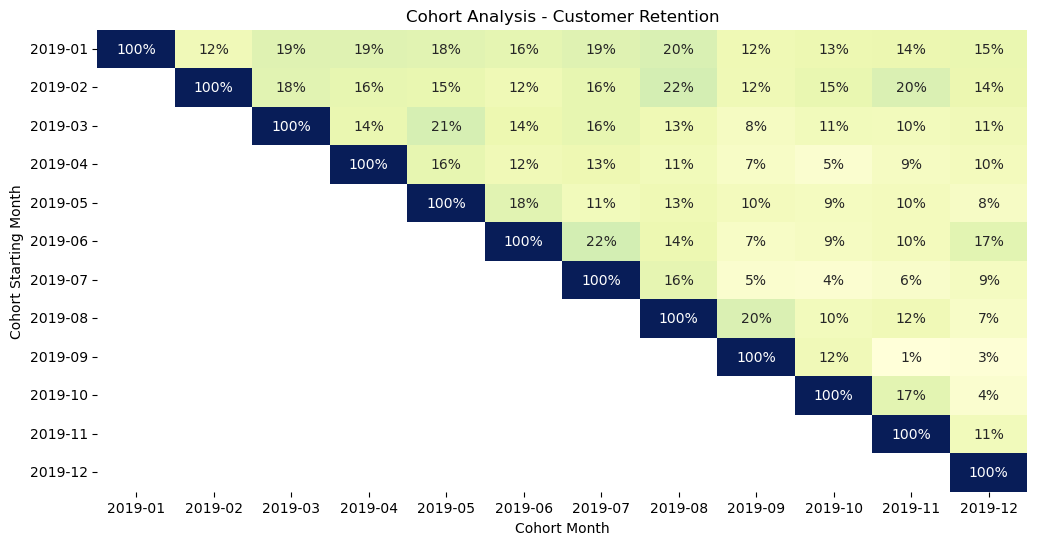

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already imported the data into the 'df' DataFrame

# Convert 'Transaction_Date' to datetime format
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'])

# Extract 'Year' and 'Month' to create a 'YearMonth' column
df['YearMonth'] = df['Transaction_Date'].dt.strftime('%Y-%m')

# Calculate the repeat rate
def calculate_repeat_rate(df):
    first_purchase = df.groupby('CustomerID')['Transaction_Date'].min()
    repeat_customers = (first_purchase < df['Transaction_Date'].max()).sum()
    total_customers = df['CustomerID'].nunique()
    return repeat_customers / total_customers * 100

repeat_rate = df.groupby('YearMonth').apply(calculate_repeat_rate).reset_index()
repeat_rate.columns = ['Month', 'Repeat_Rate']

# Perform cohort analysis to track customer retention
def cohort_analysis(df):
    df['CohortMonth'] = df.groupby('CustomerID')['Transaction_Date'].transform('min').dt.to_period('M')
    cohorts = df.groupby(['CohortMonth', 'YearMonth'])['CustomerID'].nunique().reset_index()
    cohorts['Retention'] = cohorts.groupby('CohortMonth')['CustomerID'].transform(lambda x: x / x.iloc[0])
    return cohorts

cohort_data = cohort_analysis(df)
print(cohort_data)
# Plot cohort retention
plt.figure(figsize=(12, 6))
pivot_cohort = cohort_data.pivot_table(index='CohortMonth', columns='YearMonth', values='Retention')
sns.heatmap(pivot_cohort, annot=True, fmt='.0%', cmap='YlGnBu', cbar=False)
plt.xlabel('Cohort Month')
plt.ylabel('Cohort Starting Month')
plt.title('Cohort Analysis - Customer Retention')
plt.show()


It looks like you found that the month with the maximum retention rate is January 2019, with a retention rate of 100.00%. This means that all customers who made their first purchase in January 2019 returned to make a subsequent purchase during the analysis period.

This is an excellent insight, as it suggests that customers who started in January 2019 were highly likely to become repeat customers. You can further explore and analyze the behavior of this cohort to understand what contributed to their high retention rate and apply these insights to your marketing and customer retention strategies.